# <center><b> <em> Data Clustring (Kmeans and ACP for Visualisation) </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from matplotlib.patches import Circle


In [61]:
data = pd.read_csv("../data/rfm.csv")

In [62]:
mixed_data = pd.read_csv("../data/mixed_data.csv")

## <font color="green"> || - Analyse statistique des données </font>

### 1. Description des données

In [63]:
# Statistical summary of the RFM
data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,5899.000000,5899.000000,5899.000000,5899.000000,5898.000000,5.899000e+03
mean,15316.746737,201.646042,6.234955,2795.096680,inf,-inf
std,1716.135886,210.914567,12.815370,13823.791103,NaN,NaN
min,12346.000000,1.000000,0.000000,-1343.240000,0.000000,-inf
25%,13831.500000,25.000000,1.000000,327.800000,0.000000,1.705230e+02
50%,15319.000000,95.000000,3.000000,837.260000,0.000000,2.709400e+02
75%,16800.500000,380.000000,7.000000,2164.385000,1.541748,4.040507e+02
max,18287.000000,739.000000,379.000000,578408.640000,inf,1.320650e+04


### <font color="yellow"> Intérprétations des Statistiques : </font>
    - recency: Les statistiques indiquent que la valeur minimale est de 1 jour, la valeur maximale est de 739 jours et la moyenne est d'environ 201 jours, la médiane (valeur au milieu) est de 95 jours, ce qui signifie que la moitié des clients ont effectué un achat dans les 95 derniers jours.
    - frequency: Les statistiques indiquent que. La moyenne est d'environ 6 achats par client, avec une médiane de 3 achats. On constate une grande variabilité dans les habitudes d'achat des clients.
    - monetary : Les statistiques indiquent que la valeur minimale est négative (-1343.24), ce qui pourrait indiquer des remboursements ou des annulations d'achats. La moyenne est d'environ 2795.10, avec une médiane de 837.26. La valeur maximale est de 578408.64, ce qui suggère une grande variabilité dans les montants dépensés par les clients.
    - basket_average : Il s'agit du montant moyen dépensé par achat. Les statistiques indiquent que la valeur minimale est négative, ce qui suggère des remboursements ou des annulations d'achats. La moyenne est d'environ 540.07, avec une médiane de 270.94. La valeur maximale est de 13206.50, ce qui indique une grande variabilité dans les montants dépensés par achat.


### 2. 3D Scatterplot of Recency, Frequency, and Monetary

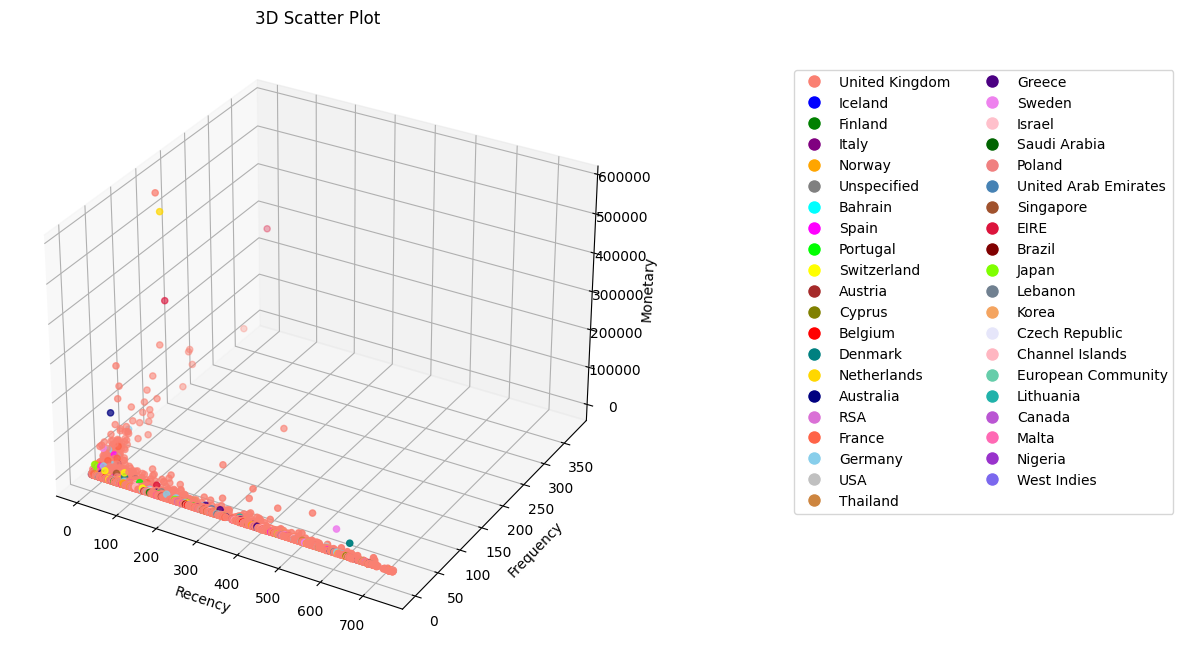

In [64]:
from mpl_toolkits.mplot3d import Axes3D

country_colors = {
    'United Kingdom': 'salmon', 'Iceland': 'blue', 'Finland': 'green', 'Italy': 'purple', 'Norway': 'orange', 'Unspecified': 'gray', 'Bahrain': 'cyan', 'Spain': 'magenta', 'Portugal': 'lime',
    'Switzerland': 'yellow', 'Austria': 'brown', 'Cyprus': 'olive', 'Belgium': 'red','Denmark': 'teal','Netherlands': 'gold','Australia': 'navy',
    'RSA': 'orchid','France': 'tomato','Germany': 'skyblue','USA': 'silver','Thailand': 'peru','Greece': 'indigo','Sweden': 'violet',
    'Israel': 'pink','Saudi Arabia': 'darkgreen','Poland': 'lightcoral','United Arab Emirates': 'steelblue', 'Singapore': 'sienna', 'EIRE': 'crimson',
    'Brazil': 'maroon', 'Japan': 'chartreuse', 'Lebanon': 'slategray','Korea': 'sandybrown', 'Czech Republic': 'lavender', 'Channel Islands': 'lightpink',
    'European Community': 'mediumaquamarine', 'Lithuania': 'lightseagreen', 'Canada': 'mediumorchid','Malta': 'hotpink', 'Nigeria': 'darkorchid', 'West Indies': 'mediumslateblue'
}


# Ajouter une colonne de couleurs basée sur le pays dans le dataframe mixed_data
mixed_data['color'] = mixed_data['country'].map(country_colors)

# Définir la taille de la figure
fig = plt.figure(figsize=(12, 8))

# Créer un axe 3D
ax = fig.add_subplot(111, projection='3d')

# Créer un graphique de dispersion en 3D avec les variables numériques et les couleurs des pays
scatter = ax.scatter(mixed_data['recency'], mixed_data['frequency'], mixed_data['monetary'], c=mixed_data['color'])

# Configurer les axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot')

# Créer une légende séparée
legend_labels = list(country_colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in country_colors.values()]
plt.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.9, 0.95) , ncol=2)


# Afficher le graphique
plt.show()

In [65]:
import plotly.graph_objects as go

country_colors = {
    'United Kingdom': 'salmon', 'Iceland': 'blue', 'Finland': 'green', 'Italy': 'purple', 'Norway': 'orange', 'Unspecified': 'gray', 'Bahrain': 'cyan', 'Spain': 'magenta', 'Portugal': 'lime',
    'Switzerland': 'yellow', 'Austria': 'brown', 'Cyprus': 'olive', 'Belgium': 'red','Denmark': 'teal','Netherlands': 'gold','Australia': 'navy',
    'RSA': 'orchid','France': 'tomato','Germany': 'skyblue','USA': 'silver','Thailand': 'peru','Greece': 'indigo','Sweden': 'violet',
    'Israel': 'pink','Saudi Arabia': 'darkgreen','Poland': 'lightcoral','United Arab Emirates': 'steelblue', 'Singapore': 'sienna', 'EIRE': 'crimson',
    'Brazil': 'maroon', 'Japan': 'chartreuse', 'Lebanon': 'slategray','Korea': 'sandybrown', 'Czech Republic': 'lavender', 'Channel Islands': 'lightpink',
    'European Community': 'mediumaquamarine', 'Lithuania': 'lightseagreen', 'Canada': 'mediumorchid','Malta': 'hotpink', 'Nigeria': 'darkorchid', 'West Indies': 'mediumslateblue'
}

mixed_data['color'] = mixed_data['country'].map(country_colors)

# Create a 3D scatter plot with the numeric variables and country colors
fig = go.Figure(data=[go.Scatter3d(
    x=mixed_data['recency'],
    y=mixed_data['frequency'],
    z=mixed_data['monetary'],
    mode='markers',
    marker=dict(
        color=mixed_data['color'],
        size=5
    )
)])

# Set the axes titles and plot title
fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    title='3D Scatter Plot',
    width=1000,  # Adjust the width of the figure
    height=800  # Adjust the height of the figure
)

# Create a custom legend
legend_labels = list(country_colors.keys())
legend_trace = [go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(
        color=[country_colors[label] for label in legend_labels],
        size=5
    ),
    showlegend=True,
    name='Countries'
)]
fig.add_trace(legend_trace[0])
fig.show()

### 3. Pourcentage of Churn Distrubition

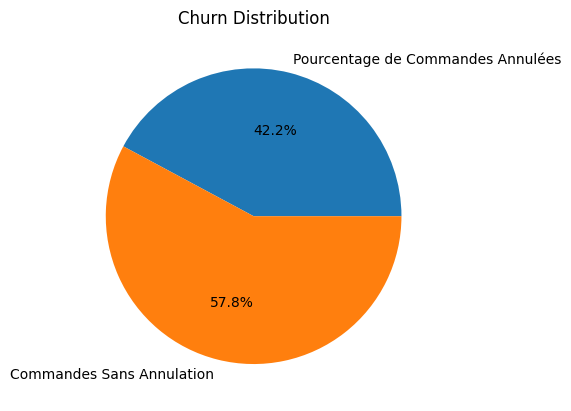

In [66]:
# Calculer le nombre de clients avec churn et sans churn
with_churn = len(data[data["pourcentage"] > 0])
without_churn = len(data[data["pourcentage"] == 0])

# Créer les données pour le graphique
churn_data = [with_churn, without_churn]
labels = ["Pourcentage de Commandes Annulées", "Commandes Sans Annulation"]

# Créer le graphique circulaire
plt.pie(churn_data, labels=labels, autopct='%1.1f%%')

# Définir le titre du graphique
plt.title("Churn Distribution")

# Afficher le graphique
plt.show()

### <font color="yellow"> Intérprétations du résultat : </font>
    - Le résultat indique que dans l'ensemble de données, il y a un pourcentage de 42,2% de commandes annulées et un pourcentage de 57,8% de commandes non annulées.  

    - Cela signifie que parmi toutes les commandes enregistrées, 42,2% ont été annulées, tandis que les 57,8% restantes correspondent aux commandes qui n'ont pas été annulées.

### 4. Boxplots for each variable

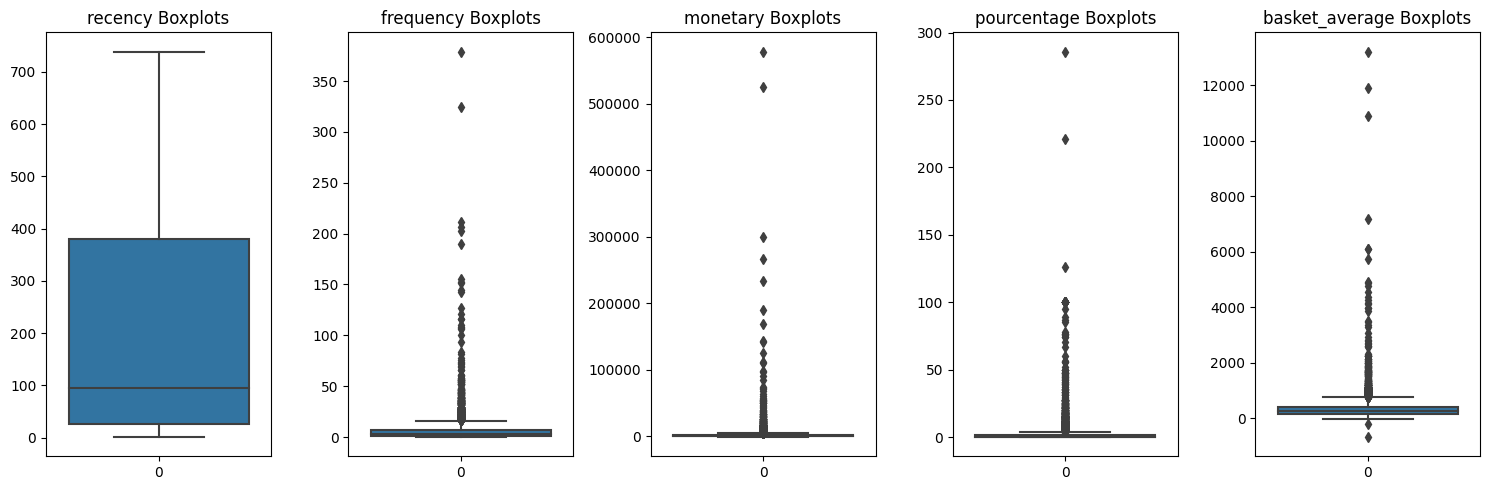

In [67]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))
for i, var in enumerate(c):
    sns.boxplot(data=data[var], ax=axes[i])
   # axes[i].set_xlabel(var)
    axes[i].set_title(var + " Boxplots")

plt.tight_layout()
plt.show()


### <font color="yellow"> Intérprétations des Boxplots : </font>
    - On constate une présenses des Outliers dans les Boxplots des variables : frequency, monetary, pourcentage, basket_average

## <font color="green"> ||| - Preprocessinge of Data </font>

### 5. Removing Outliers using Quantile method

In [68]:
# Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
quantile_threshold = 0.95

# Calculer les quantiles pour chaque variable
quantiles = data.quantile(quantile_threshold)

# Appliquer la suppression des valeurs extrêmes pour chaque variable
filtered_data = data[(data <= quantiles).all(axis=1)]

# Afficher les statistiques résumées de l'ensemble de données filtré
filtered_data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,15209.645403,181.860757,4.503740,1381.638423,1.009775,291.537999
std,1617.424216,182.902735,4.096268,1551.283066,2.041371,159.996013
min,12347.000000,1.000000,1.000000,3.750000,0.000000,3.750000
25%,13812.250000,27.000000,1.000000,340.842500,0.000000,170.739500
50%,15221.000000,90.000000,3.000000,788.635000,0.000000,262.309286
75%,16617.750000,359.000000,6.000000,1794.225000,1.078089,376.196750
max,17991.000000,628.000000,21.000000,8859.820000,11.394443,841.340000


In [69]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12347.0,3,8,4921.53,0.000000,615.191250
1,12348.0,76,5,2019.40,0.000000,403.880000
2,12350.0,311,1,334.40,0.000000,334.400000
3,12351.0,376,1,300.93,0.000000,300.930000
4,12352.0,37,9,1889.21,5.987938,209.912222


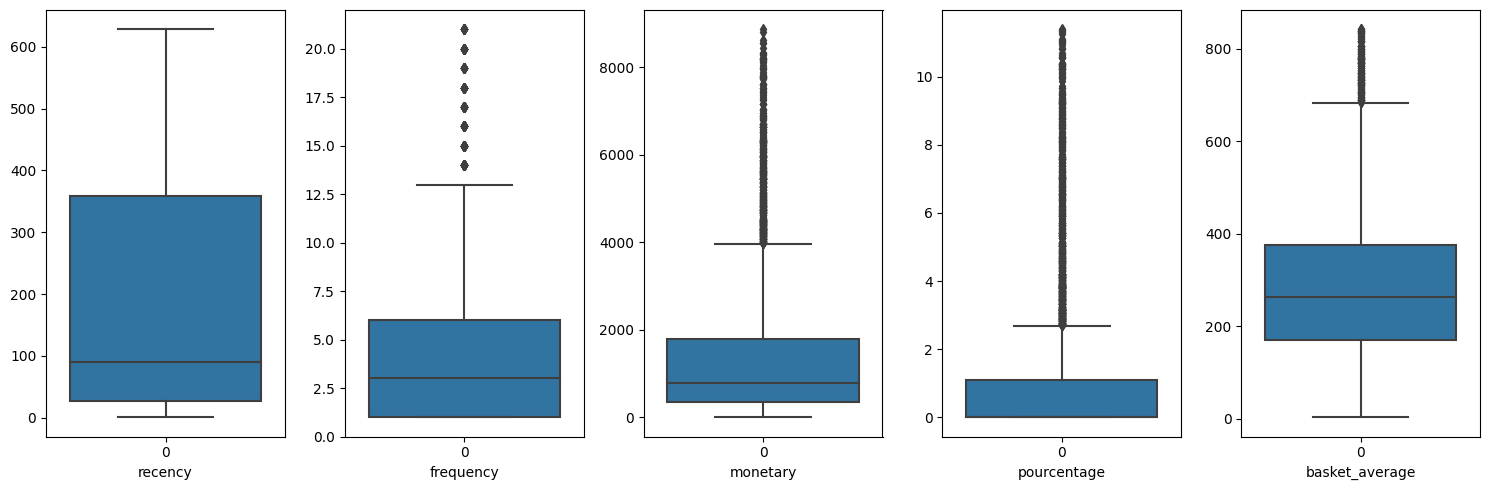

In [70]:
# Spécifiez les colonnes pour les boxplots
c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# Créez une figure avec plusieurs sous-graphiques pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourez les variables et tracez les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=filtered_data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les boxplots
plt.show()

### 7. Scaling the Data

In [71]:
from sklearn.preprocessing import StandardScaler, RobustScaler
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])

rfms = pd.DataFrame(rfms, columns=c)
rfms.head()

,recency,frequency,monetary,pourcentage,basket_average
0,-0.262048,1.0,2.843639,0.000000,1.717544
1,-0.042169,0.4,0.846828,0.000000,0.689052
2,0.665663,-0.4,-0.312536,0.000000,0.350879
3,0.861446,-0.4,-0.335565,0.000000,0.187974
4,-0.159639,1.2,0.757251,5.554213,-0.255027


## <font color="green"> IV - Clustring With Kmeans </font>

### 8. La méthode du coude (Elbow method) => pour choisir le nombre optimal de clusters dans un algorithme de clustering tel que K-means

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

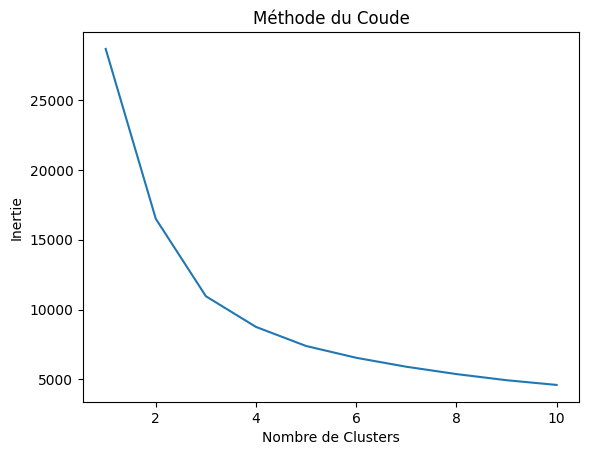

In [72]:
# Définir une liste pour stocker les valeurs de l'inertie
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfms)
    # Ajouter l'inertie du modèle actuel à la liste
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.show()

### <font color="yellow"> Intérprétations de la courbe : </font>
   
    - L'axe des abscisses du graphique représente le nombre de clusters, tandis que l'axe des ordonnées représente l'inertie ou la somme des distances au carré des points par rapport à leur centre de cluster. L'inertie diminue à mesure que le nombre de clusters augmente.
    - L'idée est de trouver le point du graphique où l'inertie diminue de manière significative et forme un "coude". Ce point est considéré comme le nombre optimal de clusters dans notre cas c'est 4

### 9. Algorithme de Kmeans

In [73]:
n_clusters = 3  #(Nous avons tester avec 4 cluster et on a remarqué une similarité dans les habitudes des custmers d'ou le choix de 3 clusters)
#n_clusters = 4  

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(rfms)

# Assignation des clusters pour chaque point
labels = kmeans.labels_

# Coordonnées des centroides de chaque cluster
centroids_original = kmeans.cluster_centers_

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## <font color="green"> IV - Visualisation des Clusters en utilisant ACP (Analyse en Composantes Principales) </font>

### 10. ACP
     * Determine the optimal number of principal components to retain based on the explained variance ratio

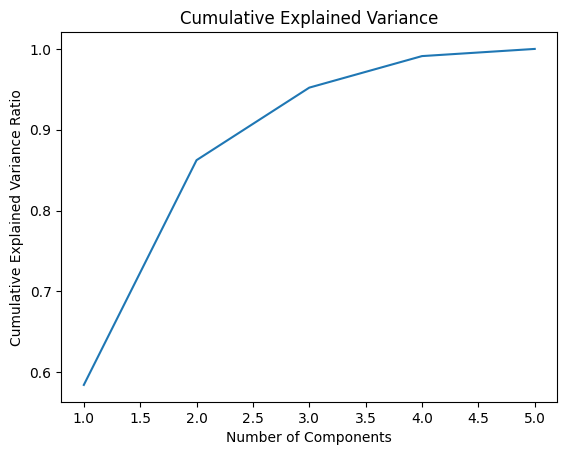

In [74]:
# Initialize and fit PCA
pca = PCA()
pca.fit(rfms)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Create cumulative explained variance plot
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

     * PCA Algo

In [75]:
# Effectuer l'ACP sur les données d'origine
pca = PCA(n_components=2)
pc = pca.fit_transform(rfms)

# Créer un nouveau DataFrame avec les composantes principales obtenues
df_acp = pd.DataFrame(data=pc, columns=['principal_component_1', 'principal_component_2'])


     * Choix du nombre de composante principale

In [77]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:", explained_variance_ratio)
print("Pourcentage de variance expliquée:", sum(explained_variance_ratio) * 100)

Variance expliquée par chaque composante principale: [0.58428514 0.27809066]
Pourcentage de variance expliquée: 86.23758028481441


     * Cercle des corrélations

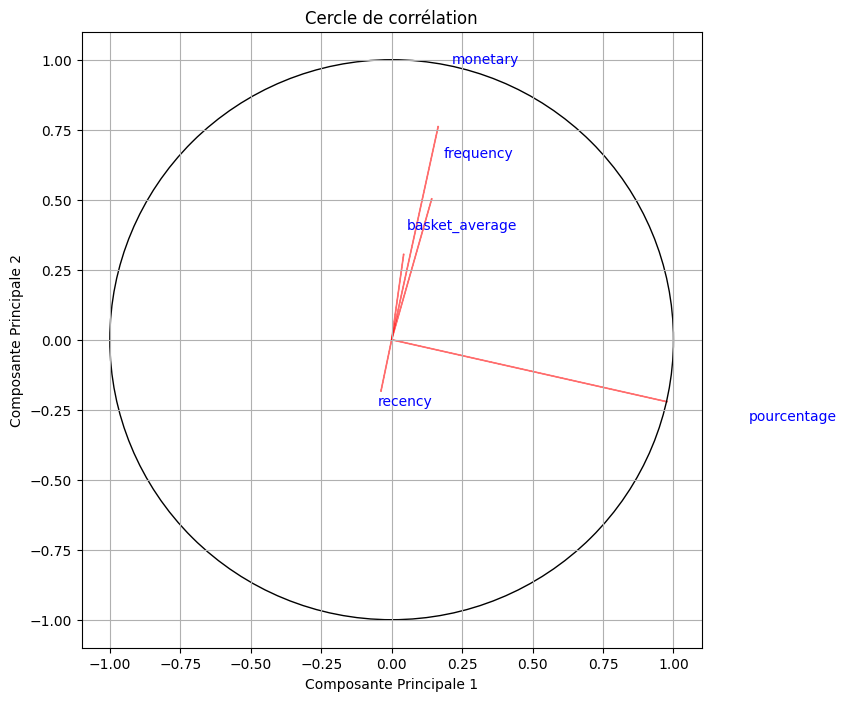

In [76]:
# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(8, 8))

# Tracer les flèches et les noms de variable
features = rfms.columns
for i, feature in enumerate(features):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    ax.text(pca.components_[0, i] * 1.3, pca.components_[1, i] * 1.3, feature, color='b')

# Tracer le cercle de corrélation
circle = Circle((0, 0), 1, fill=False, color='black')
ax.add_patch(circle)

# Définir les limites des axes
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Définir les étiquettes des axes
ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_title("Cercle de corrélation")

# Afficher la grille
ax.grid()

# Afficher le plot
plt.show()


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



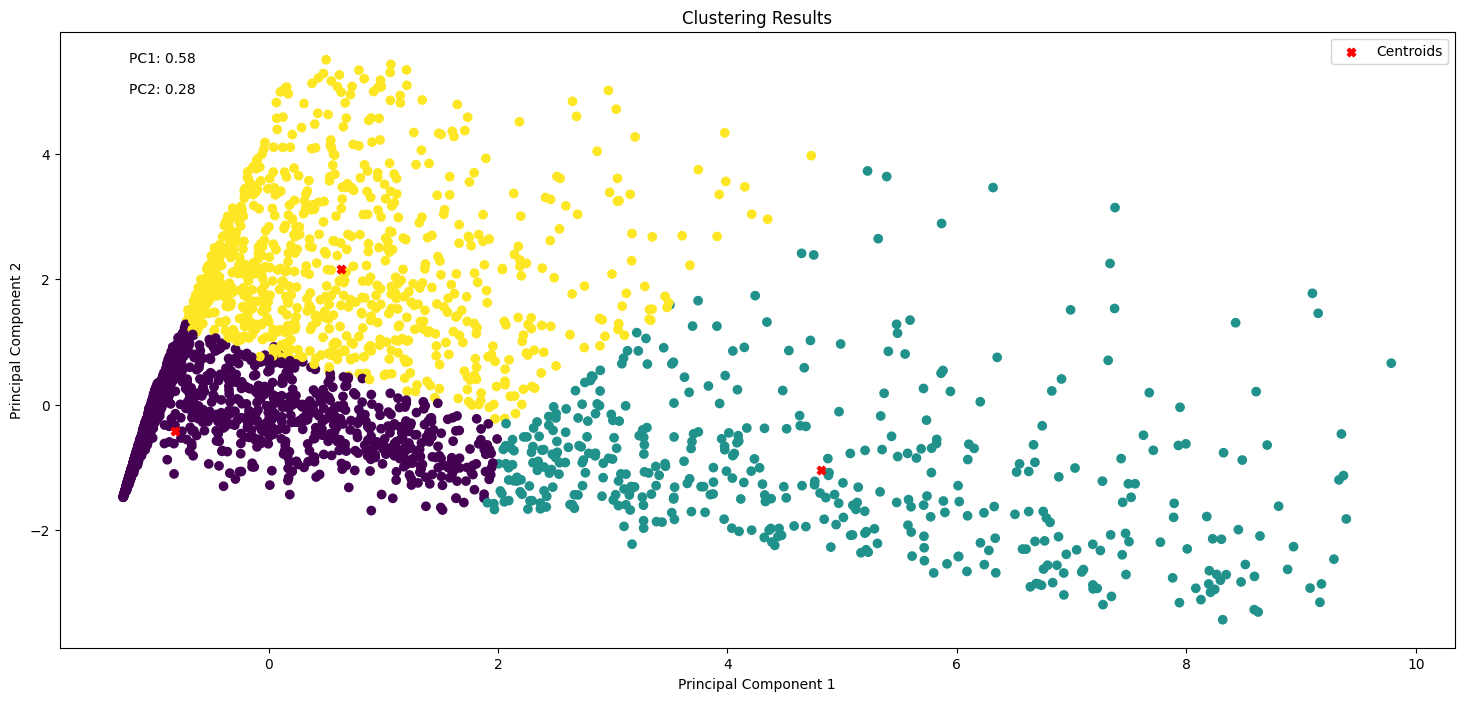

In [78]:
# Set the desired size of the figure
fig, ax = plt.subplots(figsize=(18, 8))

# Coordonnées des centroides dans l'espace des composantes principales
centroids_acp = pca.transform(centroids_original)

# Tracer les résultats du clustering avec les composantes principales
plt.scatter(df_acp.values[:, 0], df_acp.values[:, 1], c=labels)
plt.scatter(centroids_acp[:, 0], centroids_acp[:, 1], c='red', marker='X', label='Centroids')

# Add annotations for variance explained and variable contributions
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    ax.annotate(f"PC{i+1}: {ratio:.2f}", (0.05, 0.95 - i*0.05), xycoords='axes fraction')
 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')

plt.legend()
plt.show()

## <font color="green"> V - Analyse des Clusters </font>

In [85]:
kp = pd.Series(KMeans(n_clusters = 3, random_state=10, max_iter=3000).fit(rfms[c]).predict(rfms[c]))
#kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(rfms[c]).predict(rfms[c]))
rfms['Cluster'] = kp

/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



    * Averages of Clusters

In [86]:
cluster_points = rfms.groupby('Cluster').mean().reset_index()
cluster_points

,Cluster,recency,frequency,monetary,pourcentage,basket_average
0,0,0.372628,-0.033201,-0.049371,0.240121,0.005537
1,1,0.272355,0.407798,0.399886,5.878328,0.097726
2,2,-0.091773,1.535858,2.179512,1.078096,0.693534


    * Number of customers per Cluster

In [87]:
rfms.Cluster.value_counts()

0    3265
2     845
1     436
Name: Cluster, dtype: int64

    * Drop Cluster column from dataframe to prepare for radar plot

In [88]:
cluster_points_nocluster=cluster_points.drop('Cluster', axis=1)
# df_cluster_points_nocluster = pd.DataFrame(cluster_points_nocluster, columns=cluster_points_nocluster.columns[0:])

print(cluster_points_nocluster.columns)
print(len(cluster_points_nocluster))
cluster_points_nocluster


Index(['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average'], dtype='object')
3


,recency,frequency,monetary,pourcentage,basket_average
0,0.372628,-0.033201,-0.049371,0.240121,0.005537
1,0.272355,0.407798,0.399886,5.878328,0.097726
2,-0.091773,1.535858,2.179512,1.078096,0.693534


     * Radar plot to show the average variables values for Clusters

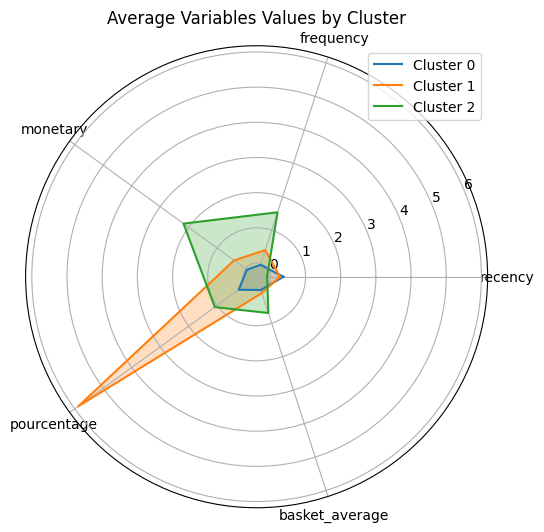

In [89]:
num_vars = len(cluster_points_nocluster.columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in cluster_points_nocluster.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cluster_points_nocluster.columns)
ax.set_title('Average Variables Values by Cluster')
ax.legend(loc='upper right')

plt.show()


## <font color="green"> VI- Defining types of customers and proposing marketing solutions :  </font>

<span style="color:green">**Cluster 0:  occasional or new customers**</span>

        - Recency: Low
        - Frequency: Low
        - Monetary: Low
        - Pourcentage: Low
        - Basket Average: Low

This cluster represents customers who have made purchases relatively recently but have low overall spending and engagement.   
They might be occasional or new customers who haven't yet become regular or high-value shoppers. These customers may be less engaged and may require targeted efforts to reactivate or retain them.

<span style="color:red">**Action:**</span> 
         Offer bonus point incentives for actions such as trying new products and following their social media accounts.


<span style="color:green">**Cluster 1:  Frequent shoppers**</span>

        - Recency: Moderate
        - Frequency: Moderate
        - Monetary: Moderate
        - Pourcentage: Moderate
        - Basket Average: High

These customers are likely to be loyal and high-value shoppers who make frequent purchases. However, they tend to cancel a part of their orders.

<span style="color:red">**Action:**</span> 

- They can benefit from limited-time loyalty points and join a loyalty program.
- Improve communication and transparency(Provide clear and accurate information about product availability, shipping times, and any potential delays)
- Provide exceptional customer service
- Optimize your website or app interface, reduce the number of steps required, and provide clear instructions. 


 <span style="color:green">**Cluster 2:  highly engaged and valuable customers**</span>

        - Recency: Low
        - Frequency: Very High
        - Monetary: Very High
        - Pourcentage: Moderate
        - Basket Average: Very High

These customers may have high-value potential, but their volatile behavior and cancellation rate suggest a need for careful monitoring and targeted retention strategies.

<span style="color:red">**Action:**</span> 

- They can benefit from limited-time loyalty points and join a loyalty program.


<span style="color:green">**Cluster 3:   Discount Shoppers**</span>

        - Recency: Moderate
        - Frequency: Moderate
        - Monetary: Moderate
        - Pourcentage: Very High
        - Basket Average: Very low

Their basket average is relatively low, suggesting that they make frequent but smaller purchases. They might be price-sensitive customers who take advantage of discounts or promotions.

<span style="color:red">**Action:**</span> 

- Identify the reasons for cancellations: examining customer feedback, conducting surveys, or gathering insights from customer service interactions.
- Provide special offers to encourage them to reconsider their cancellations. This can include discounts, freebies, or loyalty rewards. The aim is to entice them back and demonstrate your commitment to meeting their needs.
- Encourage them to provide feedback on their experiences and use that information to continually improve your products, services, and overall customer experience. Actively listen to their concerns and suggestions.
- Retargeting campaigns: Keep your brand visible and remind them of the value and benefits they can gain by continuing their relationship with your business. This can include personalized emails, targeted social media ads, or display ads.

## <font color="green"> VII- Calculate the Adjusted Rand Index (ARI) score and test the stability of your clusters over different time periods :  </font>